In [130]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df=pd.read_csv('IM_DA_KS_ALL.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df[(df['DATE'] >= '2022-11-01')&(df['DATE'] <= '2023-01-31')]


,DATE,IM_KS,DA_KS,DA_SYSTEM_PRICE,DA_TOTAL_VOLUME,DA_BUY_VOLUME,DA_SELL_VOLUME,PRECIPITATION,RADIATION,WIND_DIRECTION,WIND_SPEED,TEMPERATURE,GAS_USD,USD_JPY,GAS_JPY,TTS,TTB,TTM
0,2022-11-01 00:00:00,26.04,16.01,19.68,16085100,17531500,18189050,0.0,0.0,292.5,2.2,13.0,27.540,148.77,4097.0,149.77,147.77,148.77
1,2022-11-01 00:30:00,26.25,16.00,19.41,16050150,17907350,19453000,0.0,0.0,292.5,2.2,13.0,27.540,148.77,4097.0,149.77,147.77,148.77
2,2022-11-01 01:00:00,20.91,13.01,19.20,16013500,18151200,20249600,0.0,0.0,315.0,2.3,12.8,27.540,148.77,4097.0,149.77,147.77,148.77
3,2022-11-01 01:30:00,46.67,12.00,19.20,16013850,18287700,20478250,0.0,0.0,315.0,2.3,12.8,27.540,148.77,4097.0,149.77,147.77,148.77
4,2022-11-01 02:00:00,21.41,19.09,19.21,16017600,18416450,20585050,0.0,0.0,292.5,2.2,12.2,27.540,148.77,4097.0,149.77,147.77,148.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,2023-01-30 22:00:00,24.96,18.39,21.56,21389050,24932850,23643850,0.0,0.0,315.0,3.5,3.3,19.485,130.11,2535.0,131.11,129.11,130.11
4365,2023-01-30 22:30:00,22.50,17.23,17.69,21460750,24118200,24383300,0.0,0.0,315.0,3.5,3.3,19.485,130.11,2535.0,131.11,129.11,130.11
4366,2023-01-30 23:00:00,20.61,17.22,17.29,21367700,23556350,24225000,0.0,0.0,315.0,4.9,3.3,19.485,130.11,2535.0,131.11,129.11,130.11
4367,2023-01-30 23:30:00,17.87,16.99,16.99,20907850,22662000,24153550,0.0,0.0,315.0,4.9,3.3,19.485,130.11,2535.0,131.11,129.11,130.11


In [131]:
df.drop(['IM_KS',"DA_SYSTEM_PRICE","PRECIPITATION","RADIATION","TTS","TTB","TTM"],axis=1,inplace=True)

In [132]:
df

,DATE,DA_KS,DA_TOTAL_VOLUME,DA_BUY_VOLUME,DA_SELL_VOLUME,WIND_DIRECTION,WIND_SPEED,TEMPERATURE,GAS_USD,USD_JPY,GAS_JPY,TTS,TTB,TTM
0,2022-11-01 00:00:00,16.01,16085100,17531500,18189050,292.5,2.2,13.0,27.540,148.77,4097.0,149.77,147.77,148.77
1,2022-11-01 00:30:00,16.00,16050150,17907350,19453000,292.5,2.2,13.0,27.540,148.77,4097.0,149.77,147.77,148.77
2,2022-11-01 01:00:00,13.01,16013500,18151200,20249600,315.0,2.3,12.8,27.540,148.77,4097.0,149.77,147.77,148.77
3,2022-11-01 01:30:00,12.00,16013850,18287700,20478250,315.0,2.3,12.8,27.540,148.77,4097.0,149.77,147.77,148.77
4,2022-11-01 02:00:00,19.09,16017600,18416450,20585050,292.5,2.2,12.2,27.540,148.77,4097.0,149.77,147.77,148.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16199,2023-10-04 11:30:00,10.00,15566250,20210950,21074150,180.0,3.2,25.9,14.395,149.58,2153.0,150.58,148.58,149.58
16200,2023-10-04 12:00:00,7.51,15413800,19119000,21341300,180.0,3.2,25.9,14.395,149.58,2153.0,150.58,148.58,149.58
16201,2023-10-04 12:30:00,9.38,15328200,18877300,21196450,180.0,3.2,25.9,14.395,149.58,2153.0,150.58,148.58,149.58
16202,2023-10-04 13:00:00,9.38,15135750,18682650,20952650,180.0,3.2,25.9,14.395,149.58,2153.0,150.58,148.58,149.58


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16204 entries, 0 to 16203
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             16204 non-null  datetime64[ns]
 1   DA_KS            16204 non-null  float64       
 2   DA_TOTAL_VOLUME  16204 non-null  int64         
 3   DA_BUY_VOLUME    16204 non-null  int64         
 4   DA_SELL_VOLUME   16204 non-null  int64         
 5   WIND_DIRECTION   16204 non-null  float64       
 6   WIND_SPEED       16204 non-null  float64       
 7   TEMPERATURE      16204 non-null  float64       
 8   GAS_USD          16204 non-null  float64       
 9   USD_JPY          16204 non-null  float64       
 10  GAS_JPY          16204 non-null  float64       
 11  TTS              16204 non-null  float64       
 12  TTB              16204 non-null  float64       
 13  TTM              16204 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int

In [134]:
# Ensure DATETIME is in datetime format and sort the data
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE', inplace=True)

In [135]:
# We focus only on the  for the LSTM model
prices = df['DA_KS'].values.reshape(-1, 1)

In [136]:
# NP = (prices- prices.min()) / (prices.max() - prices.min())
NP = prices

In [137]:
# Function to create sequences of data points for the LSTM model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define the sequence length (number of time steps)
sequence_length = 96 # Corresponding to 48 hours of data at 30 minute intervals

In [138]:
# Create sequences
X, y = create_sequences(NP, sequence_length)

In [139]:
len(X)

16108

In [140]:
len(y)

16108

In [141]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
X_train

array([[[5.600e+00],
        [5.600e+00],
        [3.000e+00],
        ...,
        [9.000e+00],
        [8.590e+00],
        [7.200e+00]],

       [[1.094e+01],
        [1.093e+01],
        [1.051e+01],
        ...,
        [1.446e+01],
        [1.329e+01],
        [1.329e+01]],

       [[2.300e+01],
        [2.135e+01],
        [1.751e+01],
        ...,
        [2.186e+01],
        [2.254e+01],
        [2.298e+01]],

       ...,

       [[2.416e+01],
        [2.416e+01],
        [2.208e+01],
        ...,
        [1.729e+01],
        [1.729e+01],
        [1.103e+01]],

       [[1.113e+01],
        [1.113e+01],
        [1.064e+01],
        ...,
        [1.119e+01],
        [1.130e+01],
        [1.113e+01]],

       [[1.000e-02],
        [1.000e-02],
        [1.000e-02],
        ...,
        [2.100e-01],
        [2.000e-02],
        [1.000e-02]]])

In [143]:
y_test

array([[1.601e+01],
       [1.537e+01],
       [1.000e-02],
       ...,
       [2.688e+01],
       [1.469e+01],
       [1.983e+01]])

In [144]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12886, 96, 1), (3222, 96, 1), (12886, 1), (3222, 1))

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
model = Sequential()                    
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
# Due to resource limitations, we will limit the number of epochs and batch size
history = model.fit(X_train, y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test))
# history.save('testmodel.h5')
    
# Summarize the model's architecture
model.summary()

Epoch 1/20
202/202 [==============================] - 20s 74ms/step - loss: 35.1240 - val_loss: 6.0061
Epoch 2/20
202/202 [==============================] - 15s 73ms/step - loss: 6.5095 - val_loss: 4.1806
Epoch 3/20
202/202 [==============================] - 15s 75ms/step - loss: 5.8007 - val_loss: 4.0445
Epoch 4/20
202/202 [==============================] - 15s 74ms/step - loss: 5.4490 - val_loss: 4.1572
Epoch 5/20
202/202 [==============================] - 15s 75ms/step - loss: 5.1348 - val_loss: 3.7028
Epoch 6/20
202/202 [==============================] - 15s 74ms/step - loss: 5.1026 - val_loss: 3.6449
Epoch 7/20
202/202 [==============================] - 14s 72ms/step - loss: 5.0844 - val_loss: 3.5989
Epoch 8/20
202/202 [==============================] - 14s 71ms/step - loss: 4.9900 - val_loss: 3.8854
Epoch 9/20
202/202 [==============================] - 14s 71ms/step - loss: 4.9658 - val_loss: 3.6281
Epoch 10/20
202/202 [==============================] - 15s 72ms/step - loss: 4.83

In [146]:
model.save('KS.h5')

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


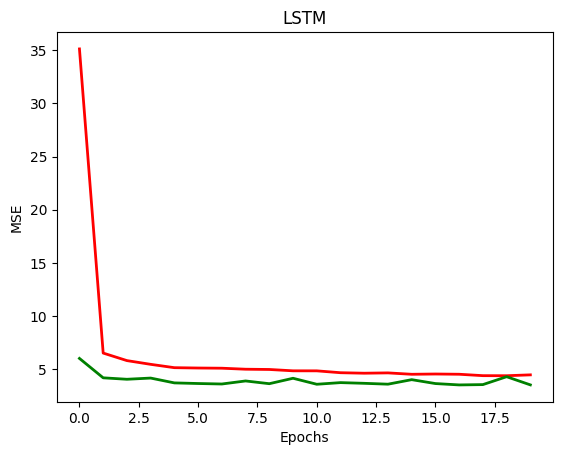

In [147]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [148]:
predicted_prices = model(X_test)

In [149]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(predicted_prices, y_test)
MSE

3.515971479859801

In [164]:
from sklearn.metrics import r2_score
R2=r2_score(predicted_prices, y_test)
R2

0.9393864432150024

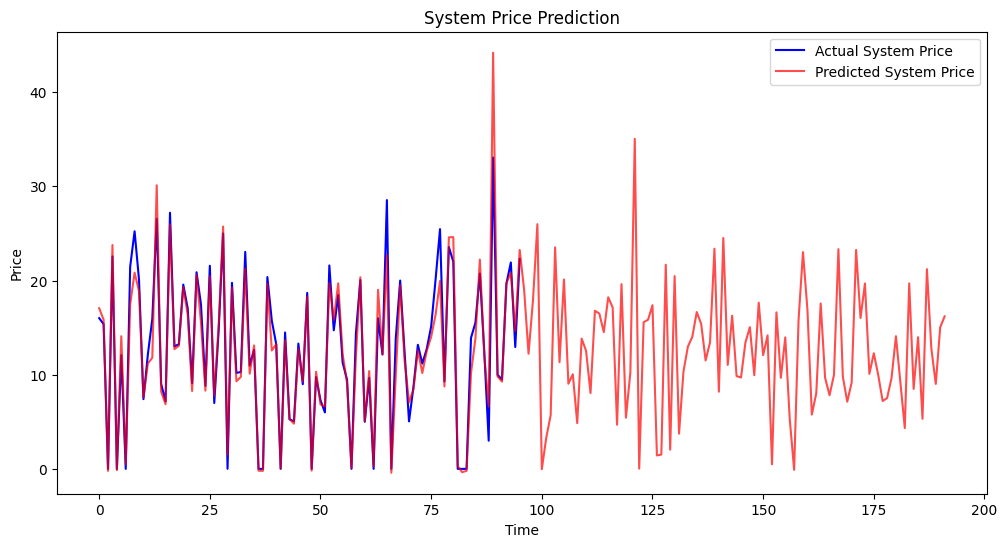

In [151]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test[:96], color='blue', label='Actual System Price')
plt.plot(predicted_prices[:192], color='red', alpha=0.7, label='Predicted System Price')
plt.title('System Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Test

In [166]:
td=pd.read_csv('IM_DA_KS_ALL.csv')
td['DATE'] = pd.to_datetime(td['DATE'])
td[(df['DATE'] >= '2022-12-01')&(td['DATE'] <= '2022-12-31')]

,DATE,IM_KS,DA_KS,DA_SYSTEM_PRICE,DA_TOTAL_VOLUME,DA_BUY_VOLUME,DA_SELL_VOLUME,PRECIPITATION,RADIATION,WIND_DIRECTION,WIND_SPEED,TEMPERATURE,GAS_USD,USD_JPY,GAS_JPY,TTS,TTB,TTM
1440,2022-12-01 00:00:00,21.29,17.00,15.00,18206550,18910950,21768650,0.0,0.0,0.0,3.1,13.5,33.780,137.09,4631.0,138.09,136.09,137.09
1441,2022-12-01 00:30:00,20.16,17.30,16.00,18290050,19007050,23034450,0.0,0.0,0.0,3.1,13.5,33.780,137.09,4631.0,138.09,136.09,137.09
1442,2022-12-01 01:00:00,18.28,17.68,17.13,18455950,19238450,24128100,0.0,0.0,292.5,1.4,12.8,33.780,137.09,4631.0,138.09,136.09,137.09
1443,2022-12-01 01:30:00,18.91,17.76,17.30,18563900,19430500,24383550,0.0,0.0,292.5,1.4,12.8,33.780,137.09,4631.0,138.09,136.09,137.09
1444,2022-12-01 02:00:00,17.29,17.30,17.30,18622700,19388500,24472700,0.0,0.0,292.5,2.3,12.4,33.780,137.09,4631.0,138.09,136.09,137.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,2022-12-30 22:00:00,30.01,30.06,28.24,20149150,24616450,23478550,0.0,0.0,315.0,2.3,6.0,29.515,132.70,3917.0,133.70,131.70,132.70
2877,2022-12-30 22:30:00,29.28,30.09,30.00,19844750,23963450,23026100,0.0,0.0,315.0,2.3,6.0,29.515,132.70,3917.0,133.70,131.70,132.70
2878,2022-12-30 23:00:00,29.15,26.91,26.83,19701850,23319600,22583050,0.0,0.0,292.5,1.9,5.1,29.515,132.70,3917.0,133.70,131.70,132.70
2879,2022-12-30 23:30:00,28.78,23.01,23.01,18762100,21315150,21721950,0.0,0.0,292.5,1.9,5.1,29.515,132.70,3917.0,133.70,131.70,132.70


In [167]:
td.drop(['IM_KS',"DA_SYSTEM_PRICE","PRECIPITATION","RADIATION"],axis=1,inplace=True)

In [168]:
td['DATE'] = pd.to_datetime(td['DATE'])
td.sort_values('DATE', inplace=True)

In [169]:
prices = td['DA_KS'].values.reshape(-1, 1)

In [170]:
NP = prices

In [171]:
# Function to create sequences of data points for the LSTM model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define the sequence length (number of time steps)
sequence_length = 96 # Corresponding to 48 hours of data at 30 minute intervals

In [172]:
Xt, yt = create_sequences(NP, sequence_length)

In [173]:
Xt

array([[[16.01],
        [16.  ],
        [13.01],
        ...,
        [23.  ],
        [23.84],
        [20.76]],

       [[16.  ],
        [13.01],
        [12.  ],
        ...,
        [23.84],
        [20.76],
        [28.01]],

       [[13.01],
        [12.  ],
        [19.09],
        ...,
        [20.76],
        [28.01],
        [19.88]],

       ...,

       [[ 3.  ],
        [ 0.09],
        [ 2.12],
        ...,
        [ 9.52],
        [10.  ],
        [ 7.51]],

       [[ 0.09],
        [ 2.12],
        [ 5.12],
        ...,
        [10.  ],
        [ 7.51],
        [ 9.38]],

       [[ 2.12],
        [ 5.12],
        [ 7.99],
        ...,
        [ 7.51],
        [ 9.38],
        [ 9.38]]])

In [174]:
yt

array([[28.01],
       [19.88],
       [18.66],
       ...,
       [ 9.38],
       [ 9.38],
       [ 9.63]])

In [175]:
Xt.shape, yt.shape

((16108, 96, 1), (16108, 1))

In [176]:
predicted_prices_test = model(Xt)

In [177]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(predicted_prices_test, yt)
MSE

3.4131278041925692